In [1]:
import math

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True 
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{libertine}', r'\RequirePackage[libertine]{newtxmath}']
mpl.rc('font', family='serif')

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rc
from cycler import cycler

mpl.rcParams['ps.usedistiller'] = 'xpdf' 

plt.style.use('seaborn-notebook')

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['legend.fontsize'] = '15'
plt.rcParams['xtick.labelsize'] = '15'
plt.rcParams['ytick.labelsize'] = '15'

monochrome=(cycler('color', sns.color_palette("husl", 8))*2+(cycler('marker', ['v', 's', "o"])*7)[0:16])
plt.rc('axes', prop_cycle=monochrome)

pd.options.display.max_rows = 999

In [2]:
# Replace this variable accordingly 
path_to_results = "../experiments/2019-11-06-21-42_StreamMiner_/"

In [4]:
masterdata = pd.read_csv(path_to_results + "StreamMiner.csv")

In [5]:
masterdata.head()

,windowsize,stepsize,path,subspace
0,1000,50,data/bioliq-1;0,1;0
1,1000,50,data/bioliq-2;0,2;0
2,1000,50,data/bioliq-2;1,2;1
3,1000,50,data/bioliq-3;0,3;0
4,1000,50,data/bioliq-3;1,3;1


In [6]:
masterdata["stepsize"] = masterdata["stepsize"].astype(int)

In [7]:
masterdata.shape

(190, 4)

In [8]:
#for value in masterdata.values: 
#    #newvalue = value
#    #newvalue[-1] = value[-1].split(";")[1] + ";" + value[-1].split(";")[0]
#    masterdata = masterdata.append({"windowsize": 1000, "stepsize": 50, "path":value[-2], 
#                                   "subspace":value[-1].split(";")[1] + ";" + value[-1].split(";")[0]},
#                                   ignore_index=True)
#masterdata.shape

In [35]:
blues5 = sns.color_palette("Blues_r", 5)
reds5 = sns.color_palette("Reds_r", 5)

In [9]:
# 1 -> Druck Wärmeträgerabscheider Sichterteil
# 2 -> Füllstand Produktgaszyklon
# 3 -> T Fallleitung
# 4 -> CO
# 5 -> T Produktgasleitung
# 13 -> Temperatur Kühlwasser Austritt Rückkühlwerk 
# 14 -> Durchfluss Rauchgas zur Fackel 
# 17 -> Durchfluss Liftgas Beschleunigungskammer 
# 18 -> Druck Außenluft 

In [10]:
bioliq = pd.read_csv("/home/fouchee/data/bioliq/bioliq-I-07-2016/bioliq_1w_interesting.csv")

In [11]:
bioliq.columns

Index(['CP 32205 XQ01', 'CP 32301 XQ01', 'CP 32203 XQ01', 'CP 32103 XQ01',
       'CQ 32301 XQ01', 'CQ 32302 XQ01', 'CQ 32303 XQ01', 'CQ 32304 XQ01',
       'CQ 32305 XQ01', 'CP 32104 XQ01', 'CQ 32401 XQ01', 'CQ 32402 XQ01',
       'CQ 32403 XQ01', 'CQ 32501_1 XQ01', 'CQ 32501_2 XQ01', 'CL 32305 XQ01',
       'CQ 32201 XQ01', 'H 32106 XQ02', 'H 32106 KG_H XQ02',
       'CQ 32201 XQ01.1'],
      dtype='object')

In [12]:
list1 = ['CF 32401 XQ01', 'CL 32401 XQ01', 'CP 32401 XQ01', 'CT 32401 XQ01', 'HK 32401 XQ01', 'LV 32401 XQ01', 'PK 32401 XQ01']
list2 = ['CP 32203 XQ01', 'CL 32203 XQ01', 'CT 32203 XQ01', 'HK 32203 XQ01',
'CP 32205 XQ01', 'CT 32205 XQ01', 'HK 32205 XQ01',
'CP 32301 XQ01', 'CQ 32301 XQ01', 'CT 32301 XQ01', 'HK 32301 XQ01',
'CP 32103 XQ01', 'CT 32103 XQ01']
g1 = []
for el1 in list1:
    for el2 in list2:
        g1 = g1 + [(el1, el2)]

In [13]:
list1 = ['CP 32103 XQ01', 'CT 32103 XQ01']
list2 = ['CP 32102 XQ01', 'CT 32102 XQ01', 'W 32102 S XQ21']

g2 = []
for el1 in list1:
    for el2 in list2:
        g2 = g2 + [(el1, el2)]

In [14]:
list1 = ['CP 32403 XQ01', 'CT 32403 XQ01', 'HK 32403 XQ01']
list2 = ['CF 32201 XQ01', 'CP 32201 XQ01', 'CQ 32201 XQ01', 'CS 32201 XQ01', 
         'CT 32201 XQ01', 'FV 32201 XQ01', 'HK 32201_1 XQ01', 'HK 32201_2 XQ01']

g3 = []
for el1 in list1:
    for el2 in list2:
        g3 = g3 + [(el1, el2)]

In [15]:
list1 = ['CP 32403 XQ01', 'CT 32403 XQ01', 'HK 32403 XQ01']
list2 = ['CF 32501 XQ01', 'CF 32501 XQ11', 'CP 32501 XQ01', 'CQ 32501_1 XQ01', 
         'CQ 32501_2 XQ01', 'CT 32501 XQ01', 'CX 32501 XQ01', 'HK 32501 XQ01']

g4 = []
for el1 in list1:
    for el2 in list2:
        g4 = g4 + [(el1, el2)]

In [16]:
list1 = ['CP 32202 XQ01', 'CT 32202 XQ01', 'HK 32202 XQ01']
list2 = ['CF 32501 XQ01', 'CF 32501 XQ11', 'CP 32501 XQ01', 'CQ 32501_1 XQ01', 
         'CQ 32501_2 XQ01', 'CT 32501 XQ01', 'CX 32501 XQ01', 'HK 32501 XQ01']

g5 = []
for el1 in list1:
    for el2 in list2:
        g5 = g5 + [(el1, el2)]

In [17]:
list1 = ['H 32106 S XQ21']
list2 = ['CF 32501 XQ01', 'CF 32501 XQ11', 'CP 32501 XQ01', 'CQ 32501_1 XQ01', 
         'CQ 32501_2 XQ01', 'CT 32501 XQ01', 'CX 32501 XQ01', 'HK 32501 XQ01']

g6 = []
for el1 in list1:
    for el2 in list2:
        g6 = g6 + [(el1, el2)]

In [18]:
subspacelist = g1 + g2 + g3 + g4 + g5 + g6

In [19]:
positions = {x:i for i,x in enumerate(bioliq.columns)}
revpositions = {i:x for i,x in enumerate(bioliq.columns)}

In [22]:
masterdata.head()

,windowsize,stepsize,path,subspace
0,1000,50,data/bioliq-1;0,1;0
1,1000,50,data/bioliq-2;0,2;0
2,1000,50,data/bioliq-2;1,2;1
3,1000,50,data/bioliq-3;0,3;0
4,1000,50,data/bioliq-3;1,3;1


<IPython.core.display.Javascript object>


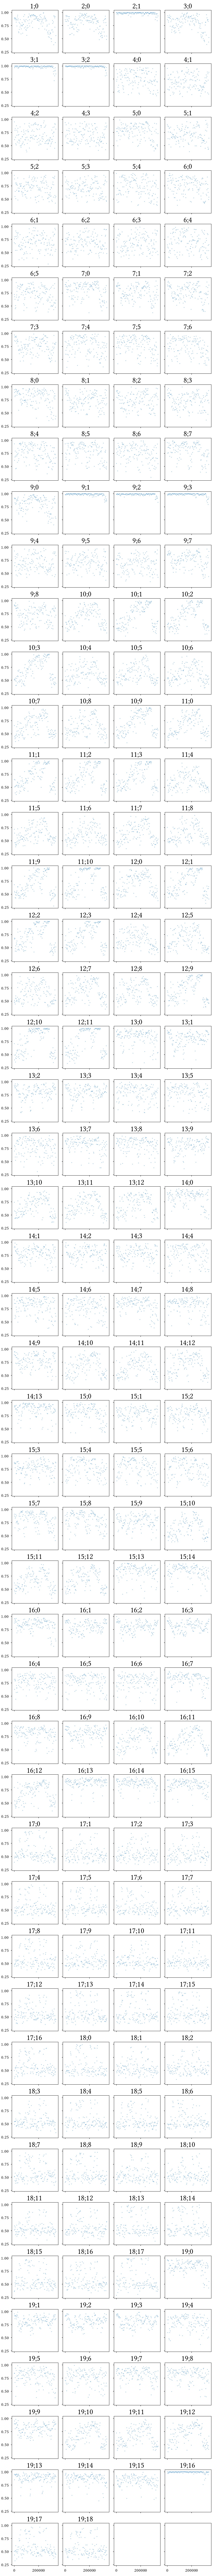

In [26]:
%matplotlib notebook

gamma = 0.99

fig, axes = plt.subplots(nrows=48, ncols=4, figsize=(10,120), sharey=True, sharex=True)
axess = axes.reshape(-1)
   
i=0
for ref in masterdata["subspace"]: 
    ax = axess[i]
    plt.sca(axess[i])
    subdata = masterdata[(masterdata["subspace"] == ref)]
    path = subdata["path"].values[0]
    f = open(path_to_results + path)
    l = f.readline()
    values = pd.Series([float(x) for x in l.split(",")])
    
    values = values[::50]
    
    plt.scatter(x=values.index*50, y=values, color=blues5[1], alpha=0.4, s=5)
    plt.title("%s"%path.split("-")[-1])
    
    i = i + 1
    
plt.tight_layout()       

In [27]:
bioliq.head()

,CP 32205 XQ01,CP 32301 XQ01,CP 32203 XQ01,CP 32103 XQ01,CQ 32301 XQ01,CQ 32302 XQ01,CQ 32303 XQ01,CQ 32304 XQ01,CQ 32305 XQ01,CP 32104 XQ01,CQ 32401 XQ01,CQ 32402 XQ01,CQ 32403 XQ01,CQ 32501_1 XQ01,CQ 32501_2 XQ01,CL 32305 XQ01,CQ 32201 XQ01,H 32106 XQ02,H 32106 KG_H XQ02,CQ 32201 XQ01.1
0,-1.58009,7.90011,8.37507,7.95016,-0.90006,0.17986,1.76993,0.60008,0.54022,-10.40009,-0.00013,-0.00005,-0.00015,1.40253,217.49997,12.79986,1.84992,0.00005,0.00008,1.85003
1,-1.57992,7.89995,8.37498,7.94984,-0.89988,0.17988,1.77008,0.60007,0.54011,-10.40007,0.00002,0.00001,0.00002,1.40241,217.49988,12.80020,1.85015,-0.00006,-0.00005,1.85000
2,-1.57994,7.90016,8.37508,7.94992,-0.89995,0.18003,1.76994,1.22988,0.54005,-10.39994,0.00013,0.00002,-0.00004,1.40257,217.50014,12.79992,1.84987,0.00001,0.00005,1.85003
3,-1.58000,7.90005,9.34995,7.95008,-0.90019,0.17991,1.77007,1.22997,0.53994,-10.40001,0.00009,-0.00012,-0.00013,1.40252,217.49991,12.79994,1.84984,0.00003,0.00001,1.84987
4,-1.58012,8.94983,9.35007,7.95004,-0.90011,0.17985,1.76996,1.23008,0.53996,-10.39986,0.00019,0.00006,0.00001,1.40267,217.49992,12.80009,1.84987,-0.00007,-0.00000,1.84986


<IPython.core.display.Javascript object>


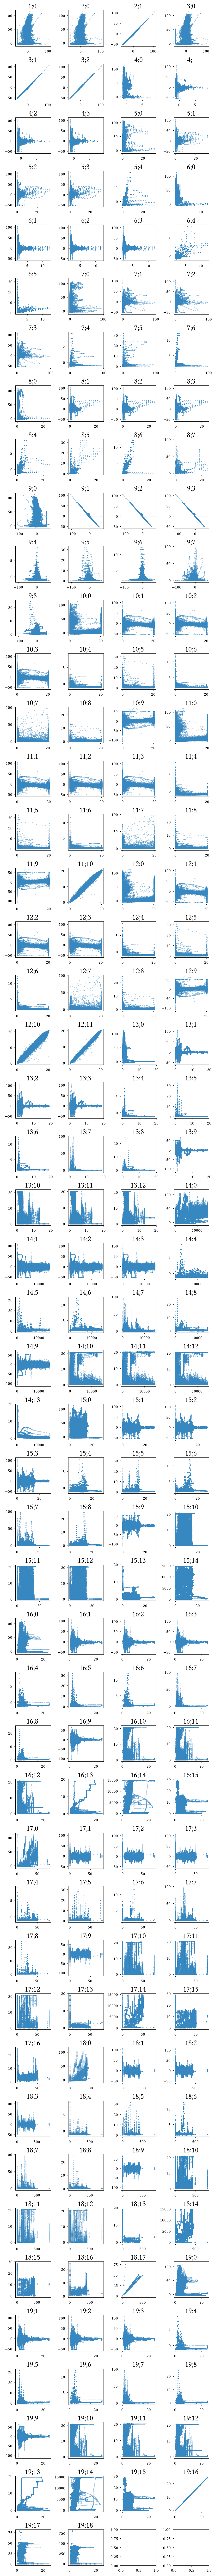

In [28]:
%matplotlib notebook

gamma = 0.99

fig, axes = plt.subplots(nrows=48, ncols=4, figsize=(10,120))
axess = axes.reshape(-1)
   
i=0
for subspace in masterdata["subspace"]: 
    ax = axess[i]
    plt.sca(axess[i])
    
    plt.scatter(x=bioliq[bioliq.columns[int(subspace.split(";")[0])]], 
                y=bioliq[bioliq.columns[int(subspace.split(";")[1])]], color=blues5[1], alpha=0.4, s=5)
    plt.title("%s"%subspace)
    
    i = i + 1
    
plt.tight_layout()

In [ ]:
#CQ 32501_2 XQ01 -> production of carbon monoxide
#HK 32409 XQ01 -> temperature of the product gas

In [29]:
bioliq.columns

Index(['CP 32205 XQ01', 'CP 32301 XQ01', 'CP 32203 XQ01', 'CP 32103 XQ01',
       'CQ 32301 XQ01', 'CQ 32302 XQ01', 'CQ 32303 XQ01', 'CQ 32304 XQ01',
       'CQ 32305 XQ01', 'CP 32104 XQ01', 'CQ 32401 XQ01', 'CQ 32402 XQ01',
       'CQ 32403 XQ01', 'CQ 32501_1 XQ01', 'CQ 32501_2 XQ01', 'CL 32305 XQ01',
       'CQ 32201 XQ01', 'H 32106 XQ02', 'H 32106 KG_H XQ02',
       'CQ 32201 XQ01.1'],
      dtype='object')

In [30]:
path

'data/bioliq-19;18'

In [31]:
subspace

'19;18'

In [32]:
masterdata[masterdata["subspace"] == subspace]

,windowsize,stepsize,path,subspace
189,1000,50,data/bioliq-19;18,19;18


## Figure 10:  Example of an interesting dependency pattern in the pyrolysis data

<IPython.core.display.Javascript object>


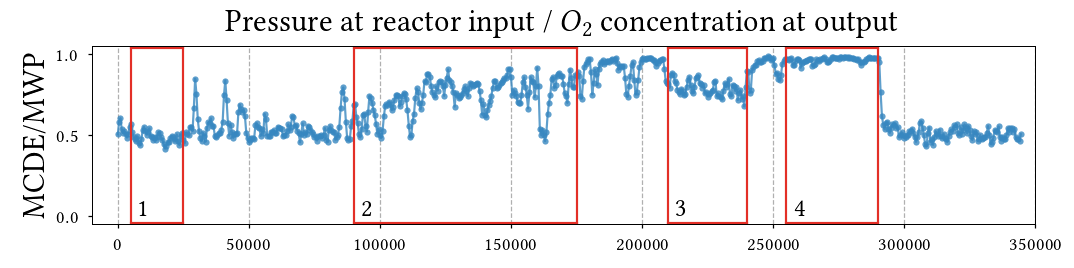

In [37]:
%matplotlib notebook

gamma = 0.90

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,3), sharey=True, sharex=True)
   
i=0

sub1 = "CQ 32401 XQ01" 
sub2 = "CP 32103 XQ01"

subspace = str(positions[sub1]) + ";" + str(positions[sub2])
path = masterdata[masterdata["subspace"] == subspace]["path"].values[0]
f = open(path_to_results + path)
l = f.readline()
values = pd.Series([float(x) for x in l.split(",")])

for j,x in enumerate(values[:-1]):
    values[j+1] = values[j]*gamma + values[j+1]*(1-gamma)

values = values[::10]

plt.plot(values.index*50,values, color=blues5[1], alpha=0.8, marker="o", markersize=5)

plt.title("%s - %s"%(revpositions[int(subspace.split(";")[0])], revpositions[int(subspace.split(";")[1])]), y=1.02) # ($^{\circ}$C)

plt.title("Pressure at reactor input / $O_2$ concentration at output")

plt.grid(axis="x", linestyle="--")

# 5, 4
zooms = [(5000, 25000), (90000, 175000), (210000, 240000), (255000, 290000)]

plt.xlim((-10000, 350000))
num = 1
for zoom in zooms:
    plt.axvline(zoom[0], color=reds5[1])
    plt.axvline(zoom[1], color=reds5[1])
    plt.axhline(y=1.04, xmin= (zoom[0]+10000)/360000,  xmax= (zoom[1]+10000)/360000, color=reds5[1])
    plt.axhline(y=-0.04, xmin= (zoom[0]+10000)/360000,  xmax= (zoom[1]+10000)/360000, color=reds5[1])
    plt.text(zoom[0]+3000, 0, "$%s$"%num, fontsize=20)
    num += 1

plt.ylabel("MCDE/MWP")

plt.ylim(-0.05, 1.05)
    
plt.tight_layout()
    
plt.savefig("plots/Fig10_top.pdf")
        

<IPython.core.display.Javascript object>


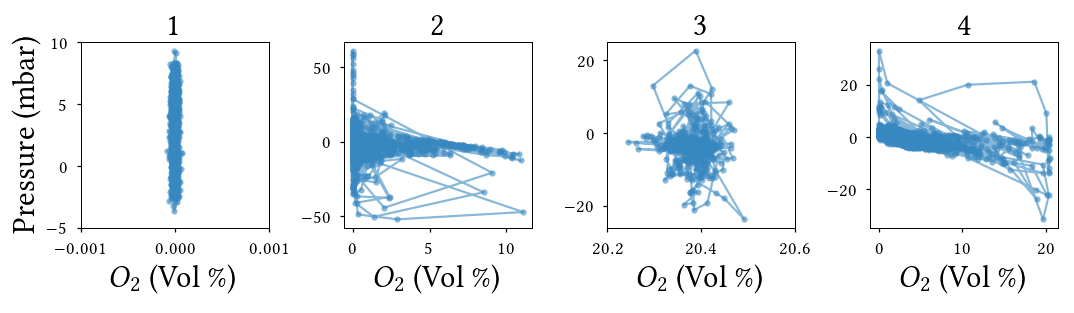

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=len(zooms), figsize=(12,3.5))
axess = axes.reshape(-1)

i = 0

a = int(subspace.split(";")[0])
b = int(subspace.split(";")[1])

for zoom in zooms: 
    plt.sca(axess[i])
    extract = bioliq[[sub1, sub2]].iloc[zoom[0]:zoom[1]]
    
    va1 = extract[extract.columns[0]].reset_index(drop=True)
    va2 = extract[extract.columns[1]].reset_index(drop=True)
    
    for j,x in enumerate(va1[:-1]):
        va1[j+1] = va1[j]*gamma + va1[j+1]*(1-gamma)
        
    for j,x in enumerate(va2[:-1]):
        va2[j+1] = va2[j]*gamma + va2[j+1]*(1-gamma)

    plt.plot(va1[::20], va2[::20], color=blues5[1], alpha=0.6, marker="o", markersize=5)
    
    if(i == 0):
        plt.xticks([-0.001, 0, 0.001])
        plt.yticks([-5, 0, 5, 10])
        
    if(i == 2):
        plt.xticks([20.2, 20.4, 20.6])
        
    if(i == 0):
        plt.ylabel("Pressure (mbar)")
    
    plt.xlabel("$O_2$ (Vol \%)", labelpad=10)
    i = i + 1
    
    plt.title("$%s$"%i)
    
plt.tight_layout()

plt.savefig("plots/Fig10_bottom.pdf")